## Entertainer Basic Info Dataset:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from textblob import TextBlob
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [7]:
df_Basic = pd.read_excel( "Entertainer - Basic Info.xlsx")

### Read the Data

In [8]:
df_Basic.head(10)

,Entertainer,Gender (traditional),Birth Year
0,Adele,F,1988
1,Angelina Jolie,F,1975
2,Aretha Franklin,F,1942
3,Bette Davis,F,1908
4,Betty White,F,1922
5,Bing Crosby,M,1903
6,Bob Hope,M,1903
7,Carol Burnett,F,1933
8,Carole Lombard,F,1908
9,Carrie Fisher,F,1956


### Data Cleaning

In [9]:
#check is there any null values or not.
df_Basic.isnull().sum()

Entertainer             0
Gender (traditional)    0
Birth Year              0
dtype: int64

In [11]:
df_Basic.describe()

,Birth Year
count,70.000000
mean,1935.585714
std,24.135783
min,1889.000000
25%,1916.000000
50%,1935.500000
75%,1954.000000
max,1988.000000


## Breakthrough Info Dataset

In [16]:
df_Breakthrough = pd.read_excel("Entertainer - Breakthrough Info.xlsx")

### Read the Data

In [14]:
df_Breakthrough.head(10)

,Entertainer,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy
0,Adele,2008,19,2009.0
1,Angelina Jolie,1999,"Girl, Interrupted",1999.0
2,Aretha Franklin,1967,I Never Loved a Man (The Way I Love You),1968.0
3,Bette Davis,1934,Of Human Bondage,1935.0
4,Betty White,1952,Life with Elilzabeth,1976.0
5,Bing Crosby,1931,Several Songs,1962.0
6,Bob Hope,1938,The Big Broadcast of 1938,1940.0
7,Carol Burnett,1959,The Garry Moore Show,1962.0
8,Carole Lombard,1934,Twentieth Century,NaN
9,Carrie Fisher,1977,Star Wars,NaN


### Data Cleaning

In [17]:
#check is there any null values or not.
df_Breakthrough.isnull().sum()

Entertainer                                     0
Year of Breakthrough/#1 Hit/Award Nomination    0
Breakthrough Name                               0
Year of First Oscar/Grammy/Emmy                 6
dtype: int64

In [18]:
df_Breakthrough.describe()

,Year of Breakthrough/#1 Hit/Award Nomination,Year of First Oscar/Grammy/Emmy
count,70.000000,64.000000
mean,1964.228571,1976.234375
std,22.411935,22.170152
min,1915.000000,1929.000000
25%,1949.500000,1962.000000
50%,1963.500000,1978.000000
75%,1983.500000,1993.000000
max,2008.000000,2017.000000


## Entertainer Last work Info Dataset

In [19]:
df_Last_work_info = pd.read_excel("Entertainer - Last work Info.xlsx")

### Read the data

In [20]:
df_Last_work_info.head(10)

,Entertainer,Year of Last Major Work (arguable),Year of Death
0,Adele,2016,NaN
1,Angelina Jolie,2016,NaN
2,Aretha Franklin,2014,NaN
3,Bette Davis,1989,1989.0
4,Betty White,2016,NaN
5,Bing Crosby,1974,1977.0
6,Bob Hope,1972,2003.0
7,Carol Burnett,2016,NaN
8,Carole Lombard,1942,1942.0
9,Carrie Fisher,2016,2016.0


### Data Cleaning

In [22]:
#check is there any null values or not.
df_Last_work_info.isnull().sum()

Entertainer                            0
Year of Last Major Work (arguable)     0
Year of Death                         40
dtype: int64

## Data Visualization

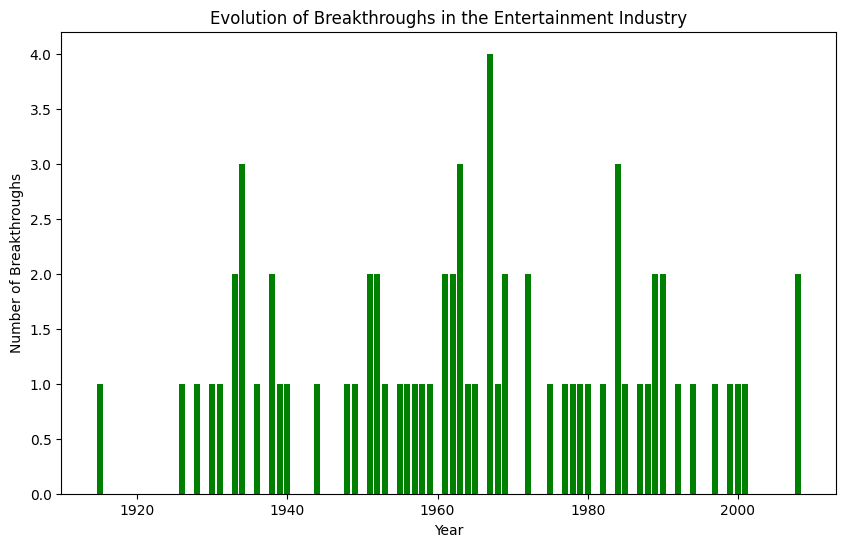

In [27]:
breakthrough_years = df_Breakthrough.groupby('Year of Breakthrough/#1 Hit/Award Nomination')['Entertainer'].count()
plt.figure(figsize=(10, 6))
plt.bar(breakthrough_years.index, breakthrough_years.values, color='green')
plt.title('Evolution of Breakthroughs in the Entertainment Industry')
plt.xlabel('Year')
plt.ylabel('Number of Breakthroughs')
plt.show()

Comparison of Birth Year, Breakthrough Year, and Last Major Work Year

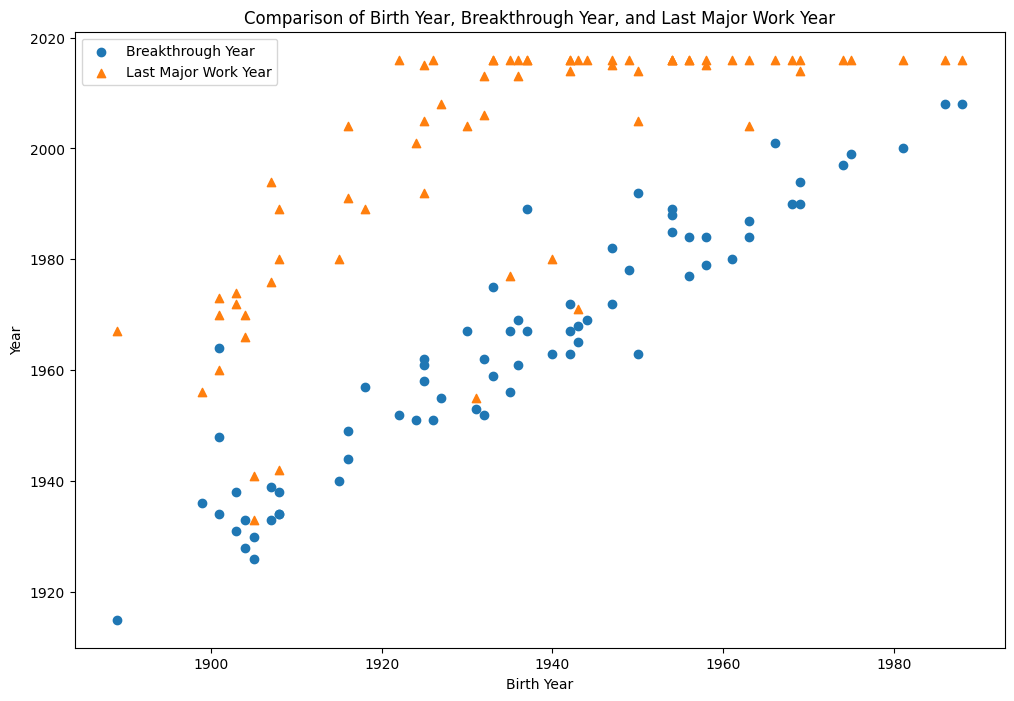

In [29]:
merged_data = pd.merge(df_Basic, df_Breakthrough, on='Entertainer', how='inner')
merged_data = pd.merge(merged_data, df_Last_work_info, on='Entertainer', how='inner')
plt.figure(figsize=(12, 8))
plt.scatter(merged_data['Birth Year'], merged_data['Year of Breakthrough/#1 Hit/Award Nomination'], label='Breakthrough Year')
plt.scatter(merged_data['Birth Year'], merged_data['Year of Last Major Work (arguable)'], label='Last Major Work Year', marker='^')
plt.title('Comparison of Birth Year, Breakthrough Year, and Last Major Work Year')
plt.xlabel('Birth Year')
plt.ylabel('Year')
plt.legend()
plt.show()

Correlation analysis

In [30]:
correlation = merged_data['Year of Breakthrough/#1 Hit/Award Nomination'].corr(merged_data['Year of Last Major Work (arguable)'])
print(f"Correlation between Breakthrough Year and Last Major Work Year: {correlation}")


Correlation between Breakthrough Year and Last Major Work Year: 0.7486752283778754


In [32]:
#Missing values in the merged dataset
print(merged_data.isnull().sum())

Entertainer                                      0
Gender (traditional)                             0
Birth Year                                       0
Year of Breakthrough/#1 Hit/Award Nomination     0
Breakthrough Name                                0
Year of First Oscar/Grammy/Emmy                  6
Year of Last Major Work (arguable)               0
Year of Death                                   40
dtype: int64


Distribution of Birth Years

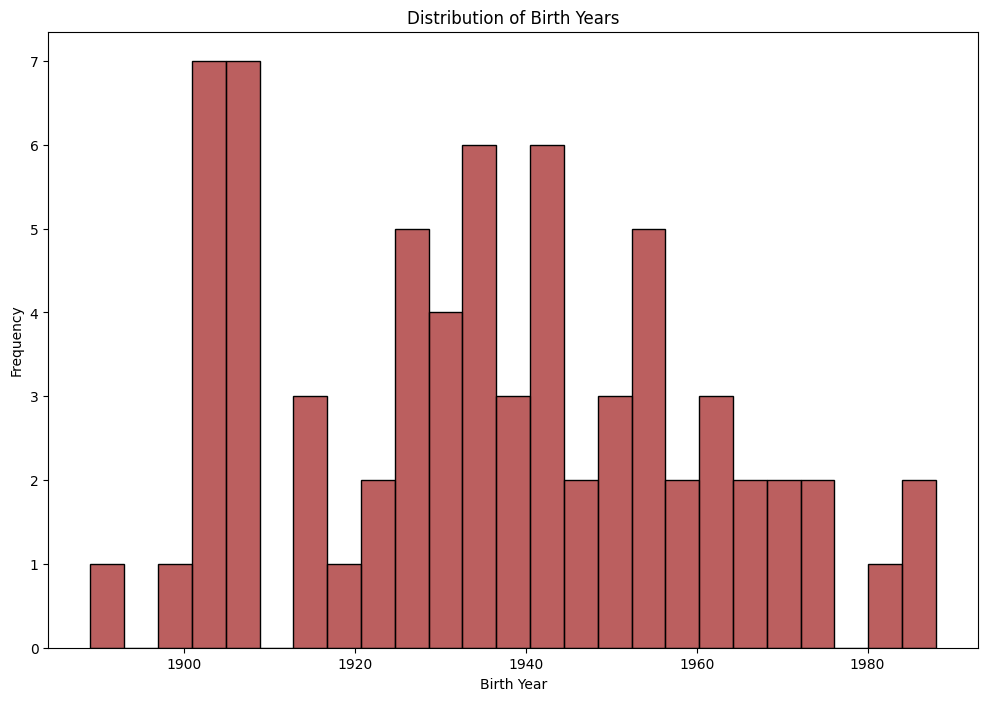

In [40]:
plt.figure(figsize=(12, 8))
sns.histplot(merged_data['Birth Year'], bins=25, color='brown')
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()


#Scatter Plot of Birth Year vs. Breakthrough Year

In [46]:
fig = px.scatter(merged_data, x='Birth Year', y='Year of Breakthrough/#1 Hit/Award Nomination',
                 hover_data=['Entertainer'], labels={'Year of Breakthrough/#1 Hit/Award Nomination': 'Breakthrough Year'})
fig.show()

# Merged data columns

In [52]:
print(merged_data.columns)

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death', 'Cluster'],
      dtype='object')


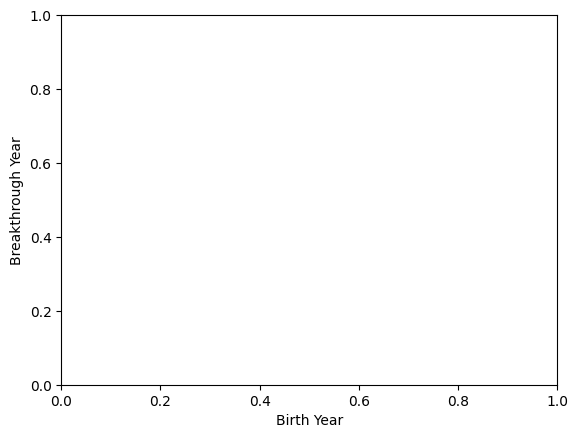

In [61]:
fig = px.scatter(merged_data, x='Birth Year', y='Year of Breakthrough/#1 Hit/Award Nomination', hover_data=['Entertainer'])
plt.xlabel('Birth Year')
plt.ylabel('Breakthrough Year')
plt.title=('Interactive Scatter Plot with Details on Demand')
fig.show()

# Heatmap for Correlation Matrix


In [69]:
correlation_matrix = merged_data[['Birth Year', 'Year of Breakthrough/#1 Hit/Award Nomination', 'Year of Last Major Work (arguable)']].corr()
fig = go.Figure(data=go.Heatmap(z=correlation_matrix.values, x=correlation_matrix.columns,  y=correlation_matrix.columns,))
fig.update_layout(title='Heatmap of Correlation Matrix',
                  xaxis_title='Features', yaxis_title='Features')
fig.show()


# Gender Distribution Bar Chart

In [75]:
gender_distribution = merged_data['Gender (traditional)'].value_counts()
fig = px.bar(gender_distribution, x=gender_distribution.index, y=gender_distribution.values, labels={'x': 'Gender', 'y': 'Count'}, title='Gender Distribution of Entertainers')
fig.show()